In [ ]:
#!pip install xlrd

# México (anterior, con datos de @guzmart)

In [1]:
import os
import datetime as dt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [20, 20]

In [2]:
def transform_guzmart(df):
    df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])
    df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
    return df

def get_guzmart(date, force=False):
    sdate = date.strftime('%Y%m%d')
    fname = f"covid_mex_{sdate}"
    local_fname = f"data/guzmart/{fname}.h5"
    if not force and os.path.isfile(local_fname):
        df = pd.read_hdf(local_fname, 'df')
    else:
        url = f"https://github.com/guzmart/covid19_mex/raw/master/01_datos/covid_mex_{sdate}.xlsx"
        df = pd.read_excel(url)
        df = transform_guzmart(df)
        #guardar version csv y hdf
        csv_fname = f"data/guzmart/{fname}.csv"
        df.to_csv(csv_fname)
        df.to_hdf(local_fname, 'df')
    return df

In [3]:
#yesterday = dt.date.today() - dt.timedelta(days=1)
#Ultimos datos válidos que encontramos
fecha = dt.date(2020,4,1)#yesterday #dt.date.today()
df = transform_guzmart(get_guzmart(fecha, force=True))#yesterday
df.head(10)

,num_caso,ent,sexo,edad,fecha_inicio,identificado,procedencia,fecha_llegada_mexico,fecha_corte,inconsistencia_nuevo,inconsistencia_nuevo_fecha,inconsistencia_omision,inconsistencia_omision_fecha_ult_aparicion
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,confirmado,Italia,2020-02-22,2020-02-27,0,NaT,0,NaT
1,2,SINALOA,M,41,2020-02-22,confirmado,Italia,2020-02-21,2020-02-28,0,NaT,0,NaT
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,confirmado,Italia,2020-02-22,2020-02-29,0,NaT,0,NaT
3,4,COAHUILA,F,20,2020-02-27,confirmado,Italia,2020-02-25,2020-02-29,0,NaT,0,NaT
4,5,CHIAPAS,F,18,2020-02-25,confirmado,Italia,2020-02-25,2020-03-01,0,NaT,0,NaT
5,6,MÉXICO,M,71,2020-02-21,confirmado,Italia,2020-02-21,2020-03-06,0,NaT,0,NaT
6,7,CIUDAD DE MÉXICO,M,46,2020-02-29,confirmado,Estados Unidos,2020-02-29,2020-03-07,0,NaT,0,NaT
7,8,QUERETARO,M,43,2020-03-09,confirmado,España,2020-03-06,2020-03-11,0,NaT,0,NaT
8,9,CIUDAD DE MÉXICO,M,41,2020-03-07,confirmado,Estados Unidos,2020-03-06,2020-03-11,0,NaT,0,NaT
9,10,CIUDAD DE MÉXICO,F,30,2020-03-07,confirmado,España,2020-03-06,2020-03-11,0,NaT,0,NaT


In [4]:
counts = df["fecha_corte"].value_counts().sort_index()
counts

2020-02-27      1
2020-02-28      1
2020-02-29      2
2020-03-01      1
2020-03-06      1
2020-03-07      1
2020-03-11      5
2020-03-12      3
2020-03-13     11
2020-03-14     15
2020-03-15     12
2020-03-16     29
2020-03-17     11
2020-03-18     25
2020-03-19     46
2020-03-20     40
2020-03-21     48
2020-03-22     65
2020-03-23     51
2020-03-24     38
2020-03-25     70
2020-03-26    111
2020-03-27    133
2020-03-28    132
2020-03-29    145
2020-03-30    101
2020-03-31    120
2020-04-01    172
Name: fecha_corte, dtype: int64

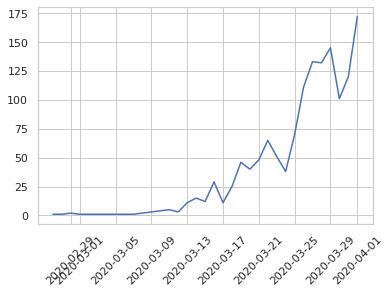

In [5]:
f, ax = plt.subplots()#figsize=(14, 10))
#ax.set(yscale="log")
plt.xticks(rotation=45)
p = sns.lineplot(data=counts)

In [6]:
cum = counts.cumsum()
cum

2020-02-27       1
2020-02-28       2
2020-02-29       4
2020-03-01       5
2020-03-06       6
2020-03-07       7
2020-03-11      12
2020-03-12      15
2020-03-13      26
2020-03-14      41
2020-03-15      53
2020-03-16      82
2020-03-17      93
2020-03-18     118
2020-03-19     164
2020-03-20     204
2020-03-21     252
2020-03-22     317
2020-03-23     368
2020-03-24     406
2020-03-25     476
2020-03-26     587
2020-03-27     720
2020-03-28     852
2020-03-29     997
2020-03-30    1098
2020-03-31    1218
2020-04-01    1390
Name: fecha_corte, dtype: int64

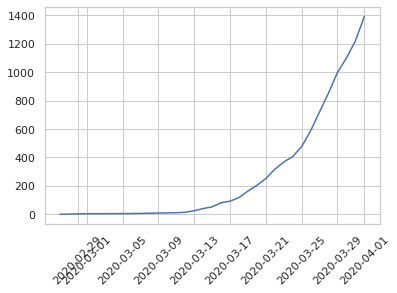

In [7]:
plt.xticks(rotation=45)
sns.lineplot(data=cum)

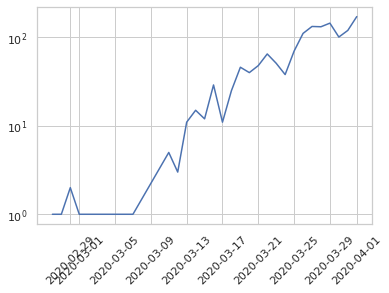

In [8]:
f, ax = plt.subplots()#figsize=(14, 10))
plt.xticks(rotation=45)
ax.set(yscale="log")
sns.lineplot(data=counts)